In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
df = pd.read_csv("/content/index_1.csv")
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [33]:
df.shape

(3636, 11)

In [30]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name', 'Year',
       'Month', 'Day', 'Hour', 'Month_Year'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [34]:
df.describe()

,date,datetime,money,Year,Month,Day,Hour
count,3636,3636,3636.000000,3636.000000,3636.000000,3636.000000,3636.000000
mean,2024-09-30 11:56:02.376237568,2024-10-01 02:35:30.535053568,31.746859,2024.259351,6.394664,15.539879,14.166667
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000,2024.000000,1.000000,1.000000,6.000000
25%,2024-07-03 00:00:00,2024-07-03 16:54:06.084750080,27.920000,2024.000000,3.000000,8.000000,10.000000
50%,2024-10-06 12:00:00,2024-10-07 02:55:12.649500160,32.820000,2024.000000,6.000000,16.000000,14.000000
75%,2025-01-08 00:00:00,2025-01-08 07:55:20.299750144,35.760000,2025.000000,10.000000,23.000000,18.000000
max,2025-03-23 00:00:00,2025-03-23 18:11:38.635000,40.000000,2025.000000,12.000000,31.000000,22.000000
std,NaN,NaN,4.919926,0.438339,3.480686,8.634903,4.227603


In [35]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0
Year,0
Month,0
Day,0
Hour,0


In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

df['Hour'] = df['datetime'].dt.hour

df['Month_Year'] = df['date'].dt.to_period('M')



In [41]:
df[['date', 'Year', 'Month', 'Day', 'Hour', 'Month_Year']].head()

,date,Year,Month,Day,Hour,Month_Year
0,2024-03-01,2024,3,1,10,2024-03
1,2024-03-01,2024,3,1,12,2024-03
2,2024-03-01,2024,3,1,12,2024-03
3,2024-03-01,2024,3,1,13,2024-03
4,2024-03-01,2024,3,1,13,2024-03


In [42]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0
Year,0
Month,0
Day,0
Hour,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   cash_type    3636 non-null   object        
 3   card         3636 non-null   object        
 4   money        3636 non-null   float64       
 5   coffee_name  3636 non-null   object        
 6   Year         3636 non-null   int32         
 7   Month        3636 non-null   int32         
 8   Day          3636 non-null   int32         
 9   Hour         3636 non-null   int32         
 10  Month_Year   3636 non-null   period[M]     
dtypes: datetime64[ns](2), float64(1), int32(4), object(3), period[M](1)
memory usage: 255.8+ KB


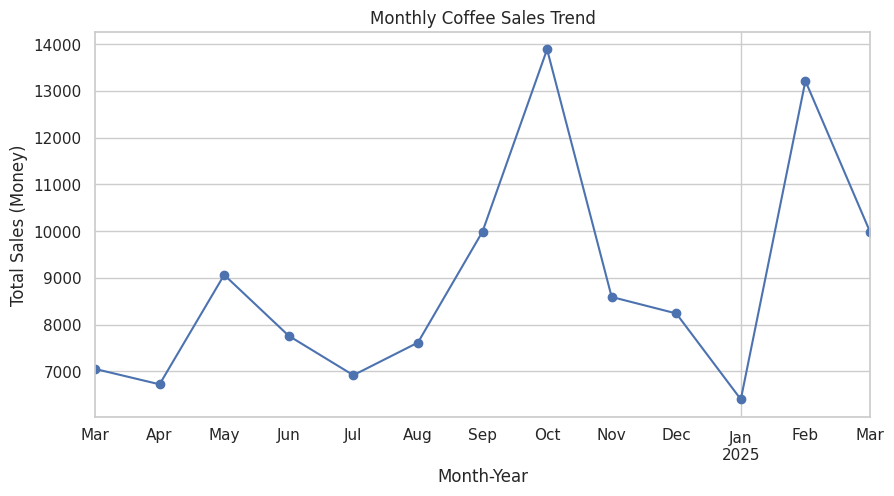

In [44]:
monthly_sales = df.groupby('Month_Year')['money'].sum()
monthly_sales.plot(marker='o')
plt.title("Monthly Coffee Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales (Money)")
plt.show()

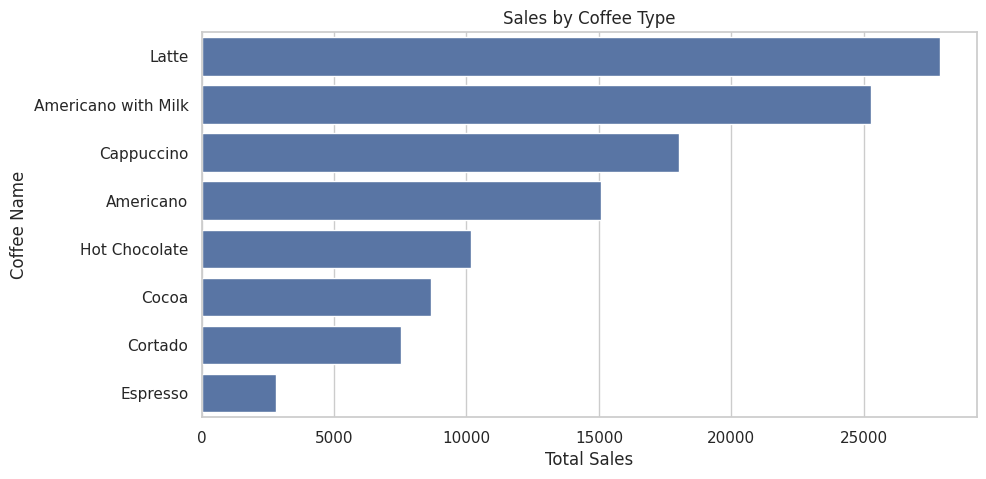

In [45]:
coffee_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
sns.barplot(x=coffee_sales.values, y=coffee_sales.index)
plt.title("Sales by Coffee Type")
plt.xlabel("Total Sales")
plt.ylabel("Coffee Name")
plt.show()

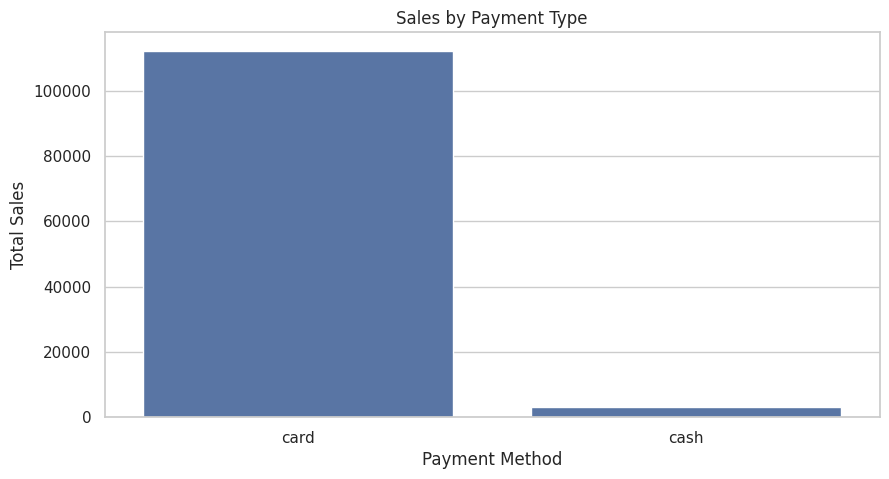

In [46]:
payment_sales = df.groupby('cash_type')['money'].sum()
sns.barplot(x=payment_sales.index, y=payment_sales.values)
plt.title("Sales by Payment Type")
plt.xlabel("Payment Method")
plt.ylabel("Total Sales")
plt.show()

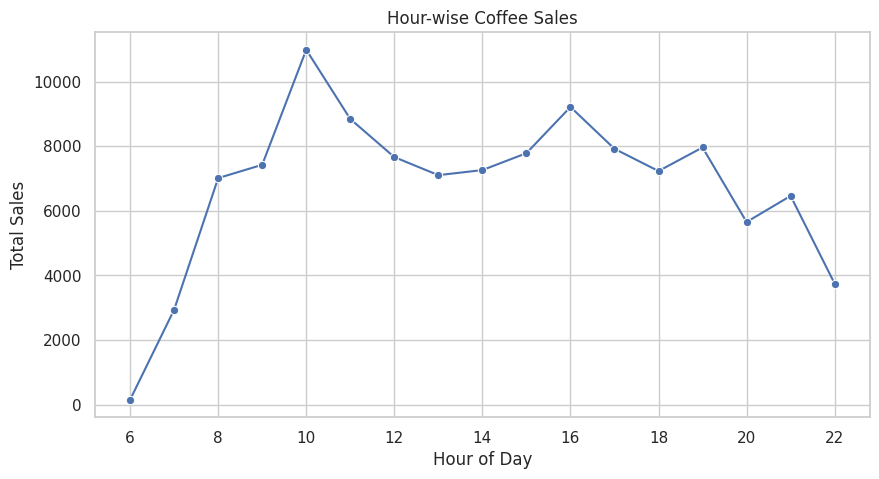

In [47]:
hourly_sales = df.groupby('Hour')['money'].sum()
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker='o')
plt.title("Hour-wise Coffee Sales")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.show()

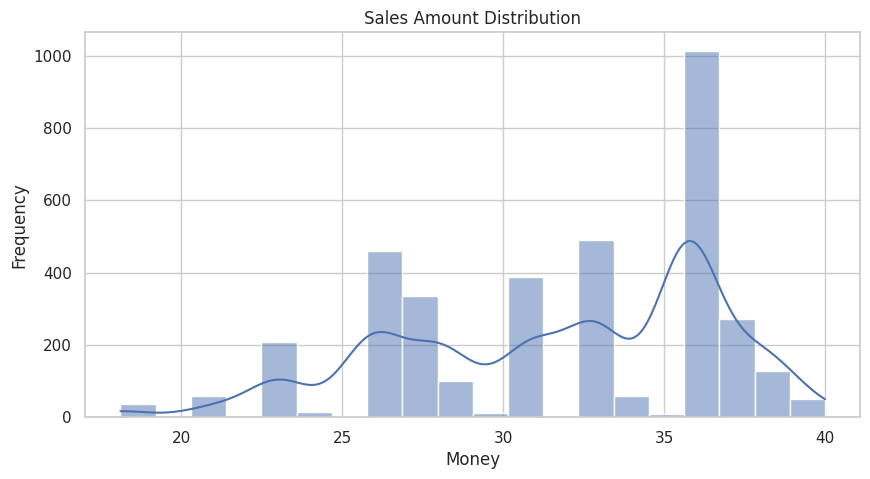

In [48]:
sns.histplot(df['money'], bins=20, kde=True)
plt.title("Sales Amount Distribution")
plt.xlabel("Money")
plt.ylabel("Frequency")
plt.show()

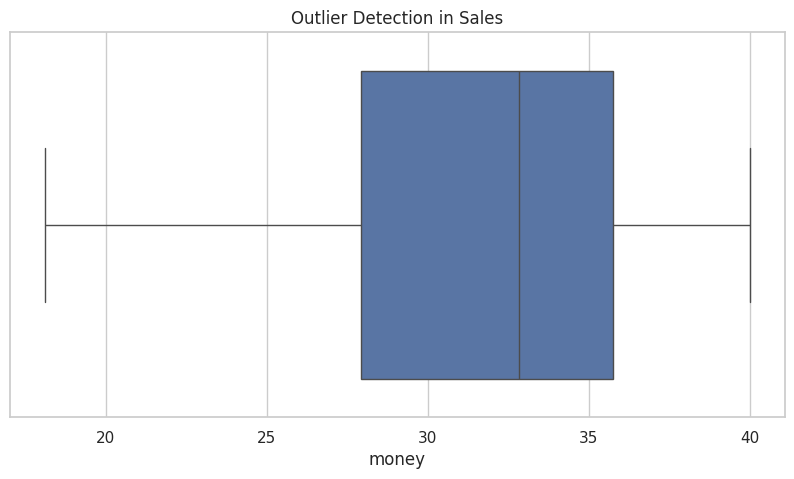

In [49]:
sns.boxplot(x=df['money'])
plt.title("Outlier Detection in Sales")
plt.show()

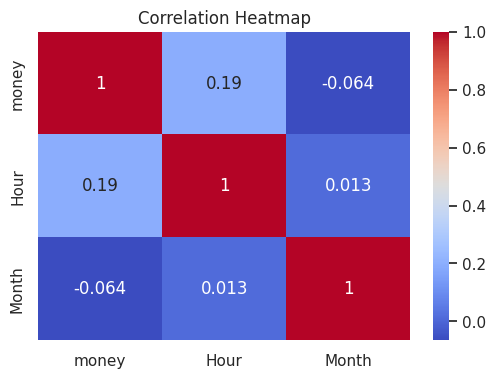

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['money', 'Hour', 'Month']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
df.head()


,date,datetime,cash_type,card,money,coffee_name,Year,Month,Day,Hour,Month_Year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024,3,1,10,2024-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1,12,2024-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1,12,2024-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024,3,1,13,2024-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024,3,1,13,2024-03
